Run the file where data is preprocessed.

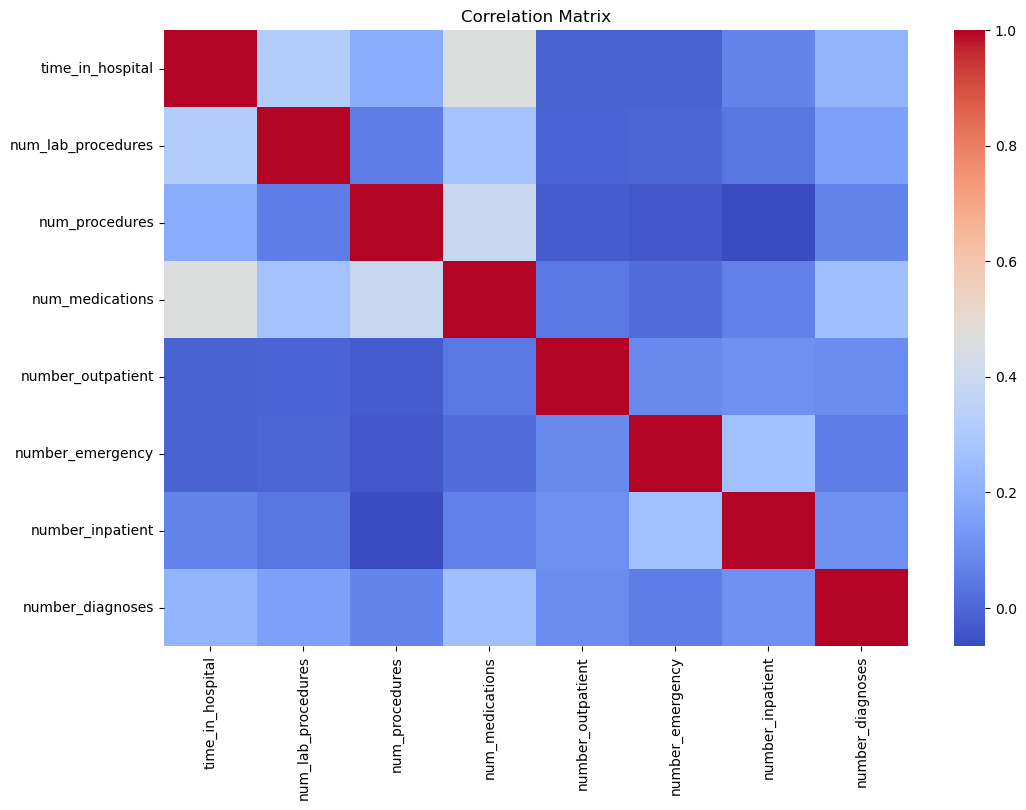

Number of features for 0.9999 explained variance: 12


In [1]:
%run preprocessing.py

Perform grid search for the selected model. Print the parameters corresponding with the best macro F1 score.

In [2]:
from sklearn.ensemble import RandomForestClassifier

# we play with many different values for the most important hyperparameters
grid_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
}

# make an instance of the model
model = RandomForestClassifier()

# the basic syntax for performing a grid search with the previously defined grid parameters
# and the custom scoring function, with 3 folds in cross validation
grid_search = GridSearchCV(model, grid_params, scoring=scoring_metric, cv=3)
# we fit the model
grid_search.fit(X_train, y_train)
# a variable in which we store the best parameters found by the grid search
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 300}


Use the model with the best parameters to predict the test data. Display the classification report.

In [3]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.76      0.69     10952
           1       0.63      0.47      0.54      9402

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.61     20354
weighted avg       0.63      0.63      0.62     20354



In [4]:
from sklearn.metrics import confusion_matrix

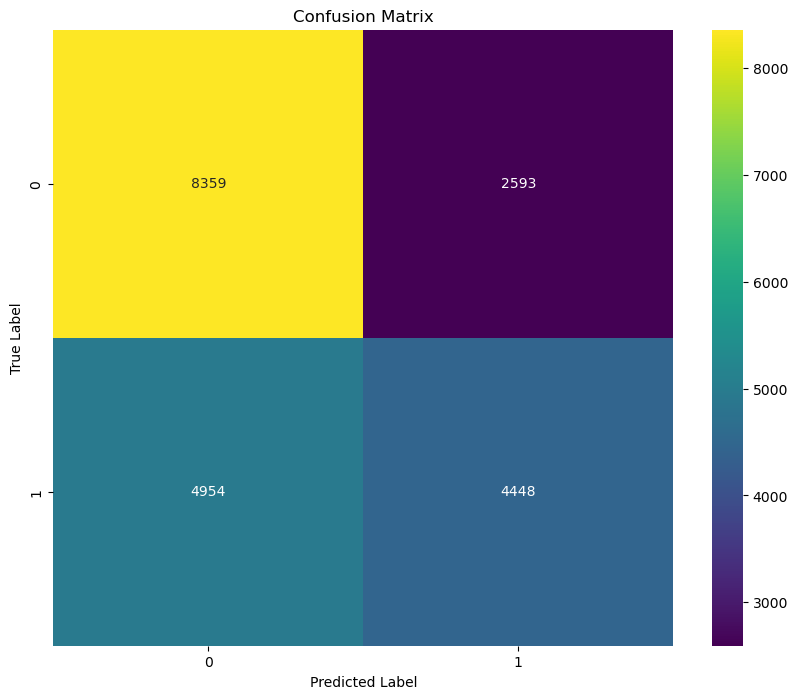

In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Update the performance table with the new results.

In [6]:
write_conclusions(model, f1, acc)